<a href="https://colab.research.google.com/github/nithin-4884/collage/blob/main/DLASSGN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

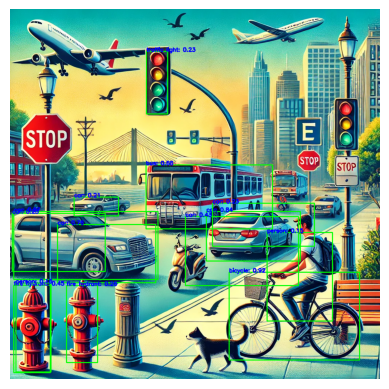

Detected Objects:
Label: bicycle, Score: 0.92, Box: [606.269   728.2877  967.12885 971.2941 ]
Label: car, Score: 0.87, Box: [ 10.492053 560.8392   409.6898   748.47766 ]
Label: car, Score: 0.84, Box: [543.2766 560.9223 803.3757 697.4442]
Label: car, Score: 0.76, Box: [131.19797 596.8022  403.9732  757.0304 ]
Label: bus, Score: 0.68, Box: [376.80933 431.0538  726.50946 608.7775 ]
Label: fire hydrant, Score: 0.45, Box: [  10.043177  764.7006    111.231895 1006.34863 ]
Label: car, Score: 0.43, Box: [485.91266 574.24585 798.07806 765.6879 ]
Label: fire hydrant, Score: 0.26, Box: [156.77968 765.83124 242.7191  978.49475]
Label: traffic light, Score: 0.23, Box: [377.45978 117.79004 436.89127 290.1821 ]
Label: car, Score: 0.23, Box: [560.0309 537.3112 842.3263 656.3615]
Label: car, Score: 0.23, Box: [  6.3455324 565.0798    263.78467   726.9473   ]
Label: car, Score: 0.21, Box: [177.88817 520.7359  300.6262  572.5621 ]
Label: person, Score: 0.18, Box: [  16.859526  758.2739    113.12054  1004

In [14]:
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

# Load the pre-trained SSD model (SSDLite MobileNetV3)
model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(pretrained=True)
model.eval()

# COCO dataset labels
COCO_Instance_Category_names = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
    'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'toilet', 'sink', 'refrigerator',
    'book', 'clock', 'vase', 'scissors','pan', 'teddy bear', 'hair drier', 'toothbrush']

def detect_objects(image_path, confidence_threshold=0.15):
    # Load image
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print(f"Error: Could not load image from {image_path}. Please check the file path and ensure the image exists.")
        return None # this indicates failure

    original_image = image.copy()

    # Convert image to tensor and normalize it
    image_tensor = F.to_tensor(image).unsqueeze(0)  # Add batch dimension

    # Run object detection (no gradient computation needed)
    with torch.no_grad():
        predictions = model(image_tensor)

    # Extract detected boxes, labels, and scores
    boxes = predictions[0]['boxes'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    detected_objects = []  # To store the details of detected objects

    # Draw bounding boxes and labels for high-confidence detections
    for i, box in enumerate(boxes):
        if scores[i] >= confidence_threshold:
            label = COCO_Instance_Category_names[labels[i]]
            score = scores[i]

            # Draw bounding box
            start_point = (int(box[0]), int(box[1]))
            end_point = (int(box[2]), int(box[3]))
            cv2.rectangle(original_image, start_point, end_point, (0, 255, 0), 2)

            # Draw the label and score
            label_text = f"{label}: {score:.2f}"
            cv2.putText(original_image, label_text, start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

            # Store detected object details
            detected_objects.append({
                'label': label,
                'score': score,
                'box': box
            })

    return original_image, detected_objects

if __name__ == "__main__":
    IMAGE_PATH = "ob6.webp"
    detected_image, detected_objects = detect_objects(IMAGE_PATH)

    if detected_image is not None:
        # Convert BGR to RGB for displaying with matplotlib
        detected_image_rgb = cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB)

        # Display the image
        plt.imshow(detected_image_rgb)
        plt.axis('off')  # Turn off axis
        plt.show()

        # Print detected objects
        if detected_objects:
            print("Detected Objects:")
            for obj in detected_objects:
                print(f"Label: {obj['label']}, Score: {obj['score']:.2f}, Box: {obj['box']}")
        else:
            print("No objects detected with confidence above the threshold.")
